# Chapter 10: Matrix Multiplication 

## 10.2 Matrix-matrix multiplication 

In [2]:
# notation 

A = [-1.5 3 2; 
      1  -1 0]

B = [-1 -1; 
      0 -2; 
      1  0]

C = A*B

2×2 Matrix{Float64}:
  3.5  -4.5
 -1.0   1.0

**Gram matrix** of matrix $A$ is the matrix $G = A^TA$. It is a symmetric matrix and the $i,j$ element $G_{ij}$ is the inner product of columns $i$ and $j$ of $A$. 

In [12]:
using LinearAlgebra
A = randn(10,3);
G = A'*A

# Gii is the norm squared of column i of A
G[2,2], norm(A[:,2])^2

(8.6683387876328, 8.6683387876328)

In [13]:
# Gij is the inner product of columns i and j 
G[1,3], A[:,1]'*A[:,3]

(-0.6138947376830963, -0.6138947376830957)

**Complexity of matrix triple product** 

We can check the associative property of matrix matrix multiplication: $(AB)C = A(BC)$
- A is $m \times n$
- B is $n \times p$
- C is $p \times q$

We can check that the left and right hand side of the associative property can take very different amounts of time to compute 

In [23]:
m = 2000; n = 50; q = 2000; p = 200;

A = randn(m,n); B = randn(n,p); C = randn(p,q);

@time LHS = (A*B)*C;
@time RHS = A*(B*C);
@time RHS = A*B*C; # evaluated as LHS or RHS?

norm(LHS-RHS)

  0.010792 seconds (4 allocations: 33.569 MiB, 16.40% gc time)
  0.006813 seconds (4 allocations: 31.281 MiB)
  0.005457 seconds (4 allocations: 31.281 MiB)


1.1673325606135748e-10

## 10.2 Composition of linear functions

**Second difference matrix** 

In [26]:
using VMLS
D(n) = [-eye(n-1) zeros(n-1)] + [zeros(n-1) eye(n-1)];
Delta(n) = D(n-1)*D(n)

delta = Delta(5) # second difference matrix

3×5 Matrix{Float64}:
 1.0  -2.0   1.0   0.0  0.0
 0.0   1.0  -2.0   1.0  0.0
 0.0   0.0   1.0  -2.0  1.0

## 10.3 Matrix power

The $k$th power of a square matrix $A$ is denoted as $A^k$ -- Julia notation is `A^k`

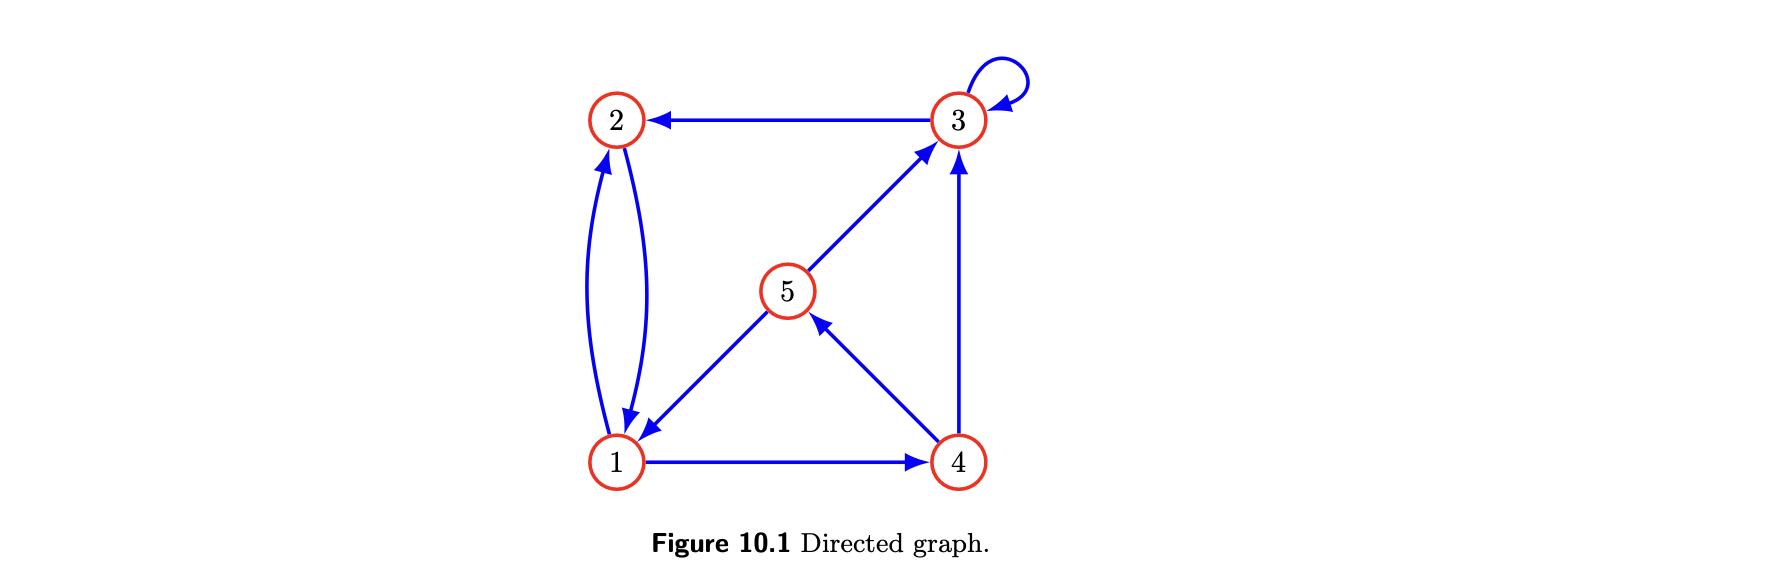

Forming the adjacency matrix of the directed graph shown above and finding out how many paths of cycles of length 8 there are (cycles meaning paths that start and stop at the same node)

In [27]:
A = [ 0 1 0 0 1; 1 0 1 0 0; 0 0 1 1 1; 1 0 0 0 0; 0 0 0 1 0]

5×5 Matrix{Int64}:
 0  1  0  0  1
 1  0  1  0  0
 0  0  1  1  1
 1  0  0  0  0
 0  0  0  1  0

In [28]:
A^2

5×5 Matrix{Int64}:
 1  0  1  1  0
 0  1  1  1  2
 1  0  1  2  1
 0  1  0  0  1
 1  0  0  0  0

In [29]:
A^8

5×5 Matrix{Int64}:
 18  11  15  20  20
 25  14  21  28  26
 24  14  20  27  26
 11   6   9  12  11
  6   4   5   7   7

In [31]:
number_of_cycles = diag(A^8) # number of cycles of length 8 for each node

5-element Vector{Int64}:
 18
 14
 20
 12
  7

**Population dynamics**

In a linear dynamical syste, we can interpret $A^\ell$ as the matrix that propagates the state forward $\ell$ time steps.



Adding from the last chapter's concept of modeling US population, $A^\ell$ is the matrix that maps the current population distrubtion into the population distribution $\ell$ periods in the future. The total population $\ell$ periods in the future is given by $\textbf{1}^T(A^\ell x_t) = (\textbf{1}^TA^\ell)x_t$.

The row vector $(\textbf{1}^TA^\ell)$ has this interpretation: its $i$th entry is the contribution to the total population in $\ell$ periods due to each person with current age $i-1$. (called the contribution factor)

In [34]:
using VMLS
data = population_data();
b = data["birth_rate"];
d = data["death_rate"];
# Dynamics matrix for populaion dynamics
A = [b'; diagonal(1 .- d[1:end-1]) zeros(length(d)-1)];

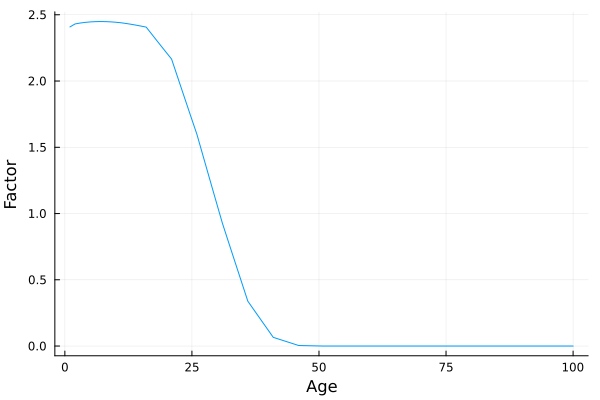

In [35]:
# calculate the contribution factor to total population in 2020 from each age in 2010
cf = ones(length(d))'*(A^100);
using Plots 
plot(cf', legend = false, xlabel="Age",ylabel="Factor")

## 10.4 QR factorization

Julia: `qr(A)` returns a tuple of $Q$ and $R$, but $Q$ is returned in a special compact format that can be converted to a regular matrix using `Matrix(Q)`.

The $R$ factor computed by Julia may have negative elements (not possible in VMLS definition). This can be changed to position because of $R_{ii}$ is negative, you can change the sign of the $i$th row of $R$ and the $i$th column of Q to get an equivalent factorization with $R_{ii} > 0$. However, negative elements on the diagonal do not pose any problem in applications of QR factorization.

In [38]:
A = randn(6,4);
Q,R = qr(A);
Q = Matrix(Q);

In [39]:
R

4×4 Matrix{Float64}:
 -3.87809   1.00788  -0.143364  -0.392501
  0.0      -1.22206   0.204592  -2.17536
  0.0       0.0       0.794864  -0.603554
  0.0       0.0       0.0       -0.905661

In [40]:
Q

6×4 Matrix{Float64}:
 -0.535389    0.135555   0.552086  -0.563651
  0.193982   -0.121363   0.164127   0.272931
 -0.347289   -0.828737  -0.118718   0.124363
  0.739946   -0.292177   0.246598  -0.485312
  0.0844483   0.187842   0.598432   0.588949
  0.0216322   0.399299  -0.485013  -0.0997576

In [41]:
norm(Q*R-A)

9.128338444105203e-16

In [43]:
Q'*Q # should be identity matrix

4×4 Matrix{Float64}:
  1.0           2.54269e-17   1.42269e-16  -9.42959e-18
  2.54269e-17   1.0          -1.15501e-16  -3.96991e-17
  1.42269e-16  -1.15501e-16   1.0           1.2799e-16
 -9.42959e-18  -3.96991e-17   1.2799e-16    1.0